In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"
base_dir = root_dir + 'Kannada'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
from fastai import *
from fastai.vision import *
import imageio

In [0]:
import json
token = {"username":"gruffalonl","key":"12f5df5dfe2b004223a02bd617011bfb"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!ls -lrt /content

total 12
drwxr-xr-x 1 root root 4096 Oct 25 16:58 sample_data
drwx------ 3 root root 4096 Oct 29 04:47 gdrive
-rw-r--r-- 1 root root   69 Oct 29 04:49 kaggle.json


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#set the data path
path = Config.data_path()/'kannada_mnist'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/kannada_mnist')

In [0]:
#!kaggle datasets list
!kaggle competitions download -c 'Kannada-MNIST' -p {path}

  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 56.5MB/s]
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 63.3MB/s]
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 33.0MB/s]
 52% 5.00M/9.71M [00:00<00:00, 6.95MB/s]
100% 9.71M/9.71M [00:00<00:00, 12.5MB/s]


In [0]:
!ls -lrt /root/.fastai/data/kannada_mnist

total 12740
-rw-r--r-- 1 root root   837450 Oct 29 04:49 test.csv.zip
-rw-r--r-- 1 root root  1987641 Oct 29 04:49 Dig-MNIST.csv.zip
-rw-r--r-- 1 root root    33899 Oct 29 04:49 sample_submission.csv
-rw-r--r-- 1 root root 10178487 Oct 29 04:49 train.csv.zip


In [0]:
#!find /root/.fastai/data/kannada_mnist -name "*.zip" | unzip
!unzip /root/.fastai/data/kannada_mnist/'*.zip' -d /root/.fastai/data/kannada_mnist

Archive:  /root/.fastai/data/kannada_mnist/train.csv.zip
  inflating: /root/.fastai/data/kannada_mnist/train.csv  

Archive:  /root/.fastai/data/kannada_mnist/test.csv.zip
  inflating: /root/.fastai/data/kannada_mnist/test.csv  

Archive:  /root/.fastai/data/kannada_mnist/Dig-MNIST.csv.zip
  inflating: /root/.fastai/data/kannada_mnist/Dig-MNIST.csv  

3 archives were successfully processed.


In [0]:
!ls -lrt /root/.fastai/data/kannada_mnist

total 141480
-rw-r--r-- 1 root root 104748945 Sep 16 22:42 train.csv
-rw-r--r-- 1 root root   8667163 Sep 16 22:42 test.csv
-rw-r--r-- 1 root root  18401187 Sep 16 22:42 Dig-MNIST.csv
-rw-r--r-- 1 root root    837450 Oct 29 04:49 test.csv.zip
-rw-r--r-- 1 root root   1987641 Oct 29 04:49 Dig-MNIST.csv.zip
-rw-r--r-- 1 root root     33899 Oct 29 04:49 sample_submission.csv
-rw-r--r-- 1 root root  10178487 Oct 29 04:49 train.csv.zip


In [0]:
DATAPATH = Path('/root/.fastai/data/kannada_mnist')

In [0]:
train = pd.read_csv(DATAPATH/'train.csv')
test = pd.read_csv(DATAPATH/'test.csv')
add_b4_mnist = pd.read_csv(DATAPATH/'Dig-MNIST.csv')

In [0]:
print('train' + str(train.shape) + '\n' + 'test' +  str(test.shape) + '\n' + 'val' + str(add_b4_mnist.shape))

train(60000, 785)
test(5000, 785)
val(10240, 785)


In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
add_b4_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def to_img_shape(data_X, data_y=[]):
    data_X = np.array(data_X).reshape(-1,28,28)
    #data_X = data_X.astype('float32')
    #data_X = data_X / 255.0
    data_X = np.stack((data_X,)*3, axis=-1)
    data_y = np.array(data_y)
    return data_X,data_y

In [0]:
train_X, train_y = train.loc[:,'pixel0':'pixel783'], train['label']
sub_val_X, sub_val_y = add_b4_mnist.loc[:,'pixel0':'pixel783'], add_b4_mnist['label']
test_X,test_idx = test.loc[:,'pixel0':'pixel783'], test['id']

In [0]:
train_X,train_y = to_img_shape(train_X, train_y)
sub_val_X,sub_val_y = to_img_shape(sub_val_X,sub_val_y)
test_X,test_idx = to_img_shape(test_X,test_idx)

In [0]:
print('train' + str(train_X.shape) + '\n' + 'val' + str(sub_val_X.shape)+'\n'+'test'+str(test_X.shape))

train(60000, 28, 28, 3)
val(10240, 28, 28, 3)
test(5000, 28, 28, 3)


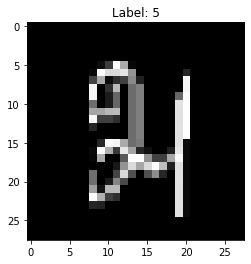

In [0]:
plt.title(f'Label: {train_y[55]}')
plt.imshow(train_X[55],cmap='gray');

In [0]:
def save_imgs(path:Path, data, labels):
    path.mkdir(parents=True,exist_ok=True)
    for label in np.unique(labels):
        (path/str(label)).mkdir(parents=True,exist_ok=True)
    for i in range(len(data)):
        if(len(labels)!=0):
            imageio.imsave( str( path/str(labels[i])/(str(i)+'.jpg') ), data[i].astype(np.uint8) )
        else:
            imageio.imsave( str( path/(str(i)+'.jpg') ), data[i].astype(np.uint8) )

In [0]:
save_imgs(Path(DATAPATH/'train'),train_X,train_y)

[Fix for Warning issue](https://forums.fast.ai/t/warnings-when-trying-to-make-an-imagedatabunch/56323/4)

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
tfms = get_transforms(flip_vert=False)

In [0]:
data = (ImageList.from_folder(DATAPATH/'train') 
        .split_by_rand_pct(0.2)       
        .label_from_folder()        
        .add_test_folder()          
        .transform(tfms, size=64)   
        .databunch().normalize(imagenet_stats))

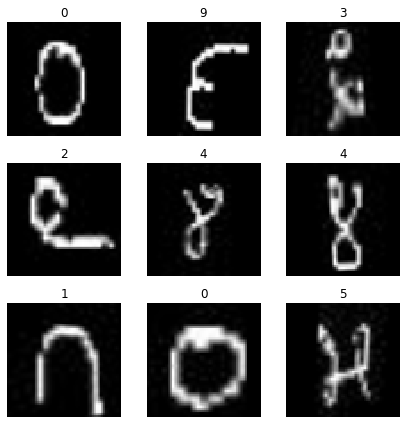

In [0]:
data.show_batch(rows=3, figsize=(6,6))

In [0]:
arch = models.resnet50

In [0]:
learn = cnn_learner(data, arch, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 54.6MB/s]


In [0]:
#learn.lr_find()

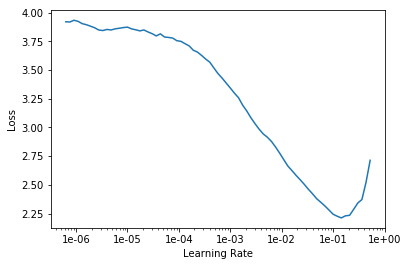

In [0]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [0]:
#learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.304715,0.130742,0.039833,0.960167,02:17
1,0.094999,0.051550,0.014667,0.985333,02:15
2,0.076152,0.028111,0.008000,0.992000,02:15
3,0.048604,0.021027,0.006833,0.993167,02:15
4,0.035060,0.019532,0.006083,0.993917,02:14


In [0]:
#learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.046215,0.030951,0.007917,0.992083,02:16
1,0.062536,0.040875,0.009833,0.990167,02:15
2,0.053093,0.028702,0.007917,0.992083,02:14
3,0.031056,0.020771,0.006167,0.993833,02:13
4,0.024135,0.018033,0.005500,0.994500,02:14


In [0]:
#learn.save('kaggle_kannada__stage1_rn50_20191018',return_path = True)

PosixPath('/root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage1_rn50_20191018.pth')

In [0]:
#!cp /root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage1_rn50_20191018.pth /content/gdrive/My\ Drive/Colab\ Notebooks/Kaggle/Kannada

In [0]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/Kaggle/Kannada

input
kaggle_kannada__stage1_rn50_20191018.pth
kannada-with-fastai-pytorch-resnet50.ipynb


In [0]:
#learn = learn.load('/content/gdrive/My Drive/Colab Notebooks/Kaggle/Kannada/kaggle_kannada__stage1_rn50_20191018')

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [0]:
learn.unfreeze

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
2,2,2,2,2
Path: /root/.fastai/data/kannada_mnist/train;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
7,3,6,8,2
Path: /root/.fastai/data/kannada_mnist/train;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /root/.fastai/data/kannada_mnist/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


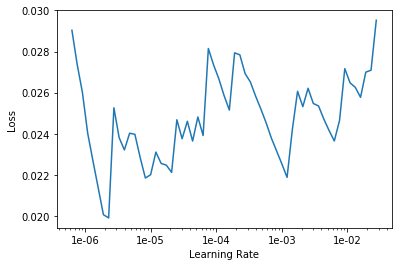

In [0]:
#learn.lr_find()
#learn.recorder.plot()

In [0]:
#learn.save('kaggle_kannada__stage2_rn50_20191021',return_path = True)

PosixPath('/root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage2_rn50_20191021.pth')

In [0]:
#!cp /root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage2_rn50_20191021.pth /content/gdrive/My\ Drive/Colab\ Notebooks/Kaggle/Kannada

In [0]:
#learn = learn.load('/content/gdrive/My Drive/Colab Notebooks/Kaggle/Kannada/kaggle_kannada__stage2_rn50_20191021')

In [0]:
lr = 1e-6

In [0]:
learn.fit_one_cycle(5,slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.028486,0.011612,0.003667,0.996333,02:53
1,0.031313,0.012299,0.004083,0.995917,02:49
2,0.026599,0.013337,0.003833,0.996167,02:54
3,0.025371,0.014540,0.003917,0.996083,02:49
4,0.026358,0.012362,0.003833,0.996167,02:52


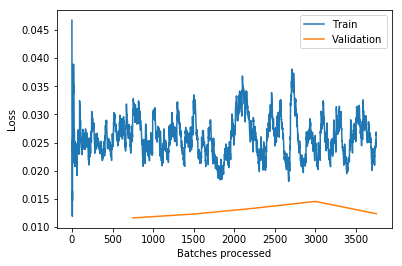

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.fit_one_cycle(5,2e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.021741,0.011935,0.003833,0.996167,02:50
1,0.022952,0.011998,0.003500,0.996500,02:53
2,0.027603,0.011930,0.003417,0.996583,02:50
3,0.021656,0.011832,0.003583,0.996417,02:51
4,0.024718,0.011535,0.003500,0.996500,02:49


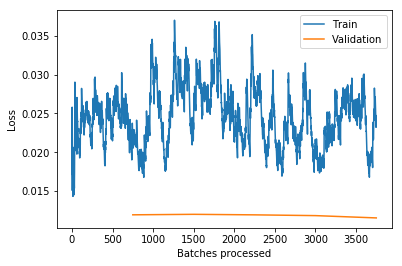

In [0]:
learn.recorder.plot_losses()

In [0]:
#learn.save('kaggle_kannada__stage3_rn50_20191022',return_path = True)

PosixPath('/root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage3_rn50_20191022.pth')

In [0]:
#!cp /root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage3_rn50_20191022.pth /content/gdrive/My\ Drive/Colab\ Notebooks/Kaggle/Kannada

In [0]:
learn = learn.load('/content/gdrive/My Drive/Colab Notebooks/Kaggle/Kannada/kaggle_kannada__stage3_rn50_20191022')

Let's train with the additional data

In [0]:
save_imgs(Path(DATAPATH/'add_train'),sub_val_X,sub_val_y)

In [0]:
add_data = (ImageList.from_folder(DATAPATH/'add_train') 
        .split_by_rand_pct(0.2)       
        .label_from_folder()        
        .add_test_folder()          
        .transform(tfms, size=64)   
        .databunch().normalize(imagenet_stats))

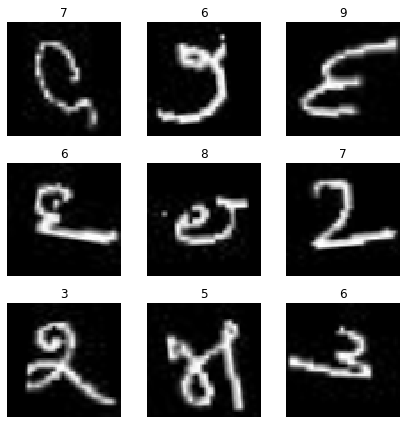

In [0]:
add_data.show_batch(rows=3, figsize=(6,6))

In [0]:
learn.freeze

<bound method Learner.freeze of Learner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
6,6,6,6,6
Path: /root/.fastai/data/kannada_mnist/train;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
2,4,9,4,9
Path: /root/.fastai/data/kannada_mnist/train;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: /root/.fastai/data/kannada_mnist/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1),

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


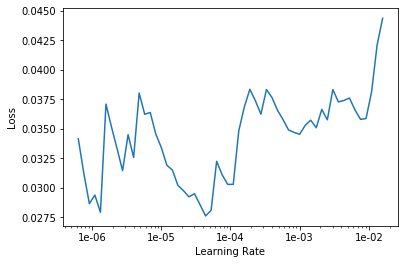

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-05

In [0]:
learn.fit_one_cycle(10, slice(lr,3*lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.026535,0.010943,0.003417,0.996583,02:31
1,0.023999,0.010611,0.003500,0.996500,02:29
2,0.022212,0.010901,0.003250,0.996750,02:29
3,0.022433,0.010557,0.003167,0.996833,02:30
4,0.024147,0.010634,0.003167,0.996833,02:30
5,0.022377,0.010635,0.003583,0.996417,02:30
6,0.025190,0.010879,0.003083,0.996917,02:30
7,0.020710,0.010446,0.003333,0.996667,02:30
8,0.024221,0.011072,0.003167,0.996833,02:30
9,0.017772,0.010928,0.003417,0.996583,02:30


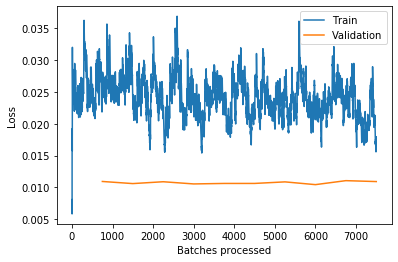

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('kaggle_kannada__stage4_rn50_20191028',return_path = True)

PosixPath('/root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage4_rn50_20191028.pth')

In [0]:
!cp /root/.fastai/data/kannada_mnist/train/models/kaggle_kannada__stage4_rn50_20191028.pth /content/gdrive/My\ Drive/Colab\ Notebooks/Kaggle/Kannada

### Test Set

In [0]:
save_imgs(Path(DATAPATH/'test_sub'),test_X,test_idx)

In [0]:
!ls $DATAPATH

Dig-MNIST.csv	       test.csv      train
Dig-MNIST.csv.zip      test.csv.zip  train.csv
sample_submission.csv  test_sub      train.csv.zip


In [0]:
test_data = ImageDataBunch.from_folder(path=DATAPATH,ds_tfms=tfms, test='test_sub', size=64).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


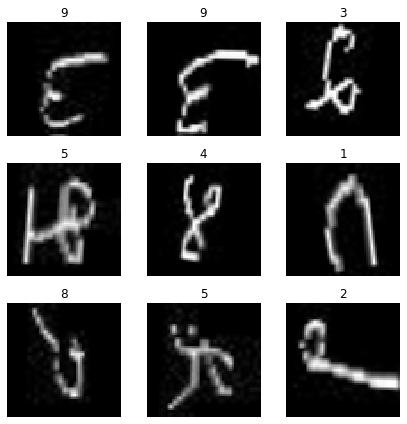

In [0]:
test_data.show_batch(rows=3, figsize=(6,6))

[Check this out for Saving & Loading a Learner](https://forums.fast.ai/t/learner-load/36579/8)

In [0]:
learn = cnn_learner(test_data, arch, metrics=[error_rate,accuracy])

In [0]:
learn = learn.load('/content/gdrive/My Drive/Colab Notebooks/Kaggle/Kannada/kaggle_kannada__stage4_rn50_20191028')

In [0]:
preds, ids = learn.get_preds(DatasetType.Test)
y = torch.argmax(preds, dim=1)

In [0]:
submission = pd.DataFrame({ 'id': ids,'label': y })
submission.to_csv(path_or_buf =DATAPATH/"submission.csv", index=False)

In [0]:
!ls $DATAPATH

Dig-MNIST.csv	   sample_submission.csv  test.csv	test_sub  train.csv
Dig-MNIST.csv.zip  submission.csv	  test.csv.zip	train	  train.csv.zip


In [0]:
! kaggle competitions submit Kannada-MNIST -f {DATAPATH/'submission.csv'} -m "My submission"

100% 19.5k/19.5k [00:09<00:00, 2.17kB/s]
403 - This competition only allows kernel submissions.
